In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

#### Basics about OpenCV

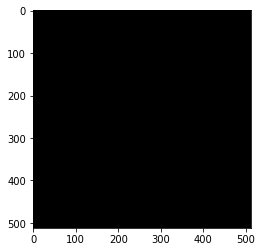

In [2]:
# Create a black image which will act as a template
img_black = np.zeros(shape = (512,512,3), dtype = np.int16)
plt.imshow(img_black)
plt.show()

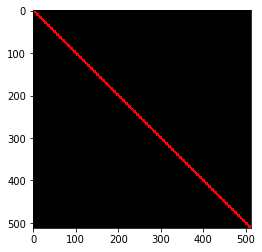

In [3]:
# 1. Straight Line
line = cv2.line(img_black, (0,0), (512,512), (255,0,0), 5)
plt.imshow(line)
plt.show()

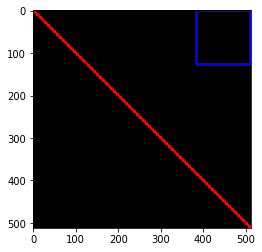

In [4]:
# 2. Rectangle
rectangle = cv2.rectangle(img_black, (384, 0), (510, 128), (0,0,255), 5)
plt.imshow(rectangle)
plt.show()

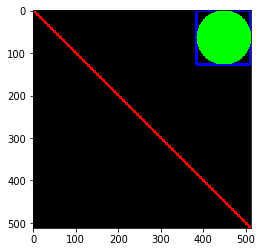

In [5]:
# 3. Circle
circle = cv2.circle(img_black, (448, 64), 64, (0, 255, 0), -1)
plt.imshow(circle)
plt.show()

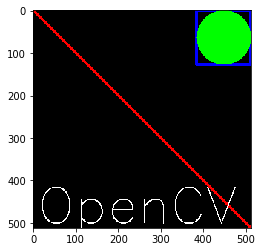

In [6]:
# 4. Writing on images
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(img_black, 'OpenCV', (10,500), font, 4, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(text)
plt.show()
#cv2.imshow('Image', text)
#cv2.waitKey(0)

#### Cropping

In [2]:
# Load the image
img = cv2.imread("olympiakos.jpg")

# Crop the image
img_cropped = img[10:200, 100:400]

# Print both images
cv2.imshow("Image", img)
cv2.imshow('Cropped image', img_cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

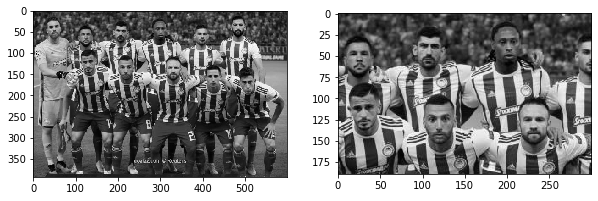

In [3]:
plt.figure(figsize = (10,8))

# Load the image
img = cv2.imread("olympiakos.jpg")

# Convert the image into grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 
img_cropped = img[10:200, 100:400]

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_cropped, cmap='gray')
plt.show()

#### Resizing

In [4]:
img = cv2.imread("olympiakos.jpg")
img_resized = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)), 
                        interpolation = cv2.INTER_AREA)

cv2.imshow("Image", img)
cv2.imshow('Resized image', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Imutils resize 
img = cv2.imread("olympiakos.jpg")
img_resized = imutils.resize(img, width=200)

cv2.imshow("Image", img)
cv2.imshow('Imutils Resize', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

(h, w, d) = img.shape
print('The shape of the original image is, width = {}, height = {}, depth = {}'.format(w, h, d))

(h, w, d) = img_resized.shape
print('The shape of the imutils image is, width = {}, height = {}, depth = {}'.format(w, h, d))

The shape of the original image is, width = 600, height = 393, depth = 3
The shape of the imutils image is, width = 200, height = 131, depth = 3


#### Rotating

In [6]:
(h,w,d) = img.shape
center = (w//2, h//2)
m = cv2.getRotationMatrix2D(center, 180, 1)
rotated = cv2.warpAffine(img, m, (w,h))
cv2.imshow('Rotated image', rotated)
cv2.waitKey(0)

-1

In [7]:
(h,w,d) = img.shape
center = (w//2, h//2)
m = cv2.getRotationMatrix2D(center, 45, 1)
rotated = cv2.warpAffine(img, m, (w,h))
cv2.imshow('Rotated image', rotated)
cv2.waitKey(0)

-1

In [13]:
# Using imutils 
rotated = imutils.rotate(img, 15)
cv2.imshow('Rotated image', rotated)
cv2.waitKey(0)

-1

In [14]:
# Using imutils convenience function to keep the entire image 
rotated = imutils.rotate_bound(img, 45)
cv2.imshow('Imutils Bound Rotation', rotated)
cv2.waitKey(0)

-1

#### Grayscale and Thresholding

gray_image is the grayscale one-channeled version of the image.
This threshold function will turn all shades darker (smaller) than 127 to 0 and all brighter (greater) to 255.

This will turn all shades smaller than 150 to 10 and all greater to 200.

In [11]:
img = cv2.imread('olympiakos.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, threshold_image = cv2.threshold(img, 127, 255,0)
ret, threshold = cv2.threshold(gray, 100, 200,10)


cv2.imshow('Image', img)
cv2.imshow('Grayscale image', gray)
cv2.imshow('Threshold image', threshold_image)
cv2.imshow('Threshold gray', threshold)

cv2.waitKey(0)

-1

#### Blurring / Smoothing

In many image processing pipelines, we must blur an image to reduce high-frequency noise, making it easier for our algorithms to detect and understand the actual contents of the image rather than just noise that will “confuse” our algorithms.

Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images.

The GaussianBlur function takes 3 parameters:
* The first parameter is the image you want to blur.
* The second parameter must be a tuple of 2 positive odd numbers. When they increase, the blur effect increases.
* The third parameter is The sigmaX and sigmaY. When left at 0, they’re automatically calculated from the kernel size.

In [16]:
blurred = cv2.GaussianBlur(img, (9,9), 0)
#blurred1 = cv2.GaussianBlur(img, (29,29), 0)
#blurred2 = cv2.GaussianBlur(img, (49,49), 0)
#blurred3 = cv2.GaussianBlur(img, (89,89), 0)


cv2.imshow('Blurred image', blurred)
#cv2.imshow('Blurred image', blurred1)
#cv2.imshow('Blurred image', blurred2)
#cv2.imshow('Blurred image', blurred3)

cv2.waitKey(0)

-1

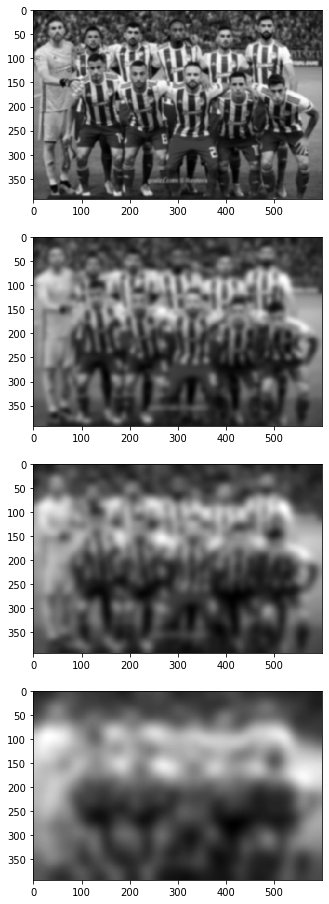

In [17]:
plt.figure(figsize=(24,16))
img = cv2.imread('olympiakos.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(img, (9,9), 0)
blurred1 = cv2.GaussianBlur(img, (29,29), 0)
blurred2 = cv2.GaussianBlur(img, (49,49), 0)
blurred3 = cv2.GaussianBlur(img, (89,89), 0)

plt.subplot(4,1,1)
plt.imshow(blurred, cmap='gray')

plt.subplot(4,1,2)
plt.imshow(blurred1, cmap = 'gray')

plt.subplot(4,1,3)
plt.imshow(blurred2, cmap = 'gray')

plt.subplot(4,1,4)
plt.imshow(blurred3, cmap = 'gray')

plt.show()

#### Detect The face and blur the faces

The detectMultiScale function is a general function that detects objects. Since we’re calling it on the face cascade, that’s what it detects.

###### The detectMultiScale function takes 4 parameters
* The first parameter is the grayscale image.
* The second parameter is the scaleFactor. Since some faces may be closer to the camera, they would appear bigger than the faces in the back. The scale factor compensates for this.
* The detection algorithm uses a moving window to detect objects. minNeighbors defines how many objects are detected near the current one before it declares the face found.
*minSize, meanwhile, gives the size of each window.

In [18]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the image
img = cv2.imread('olympiakos.jpg')
result_image = img.copy()
#img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect the face 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw a rectangle around the face
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    sub_face = img[y:y+h, x:x+w]
    sub_face = cv2.GaussianBlur(sub_face, (23,23), 30)
    result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
    

# Dsiplay the image
cv2.imshow('Image', img)
cv2.imshow('Blurred Image', result_image)
cv2.waitKey(0)

-1